In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm

In [4]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
df1=pd.read_csv(boston_url)

In [9]:
df1.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


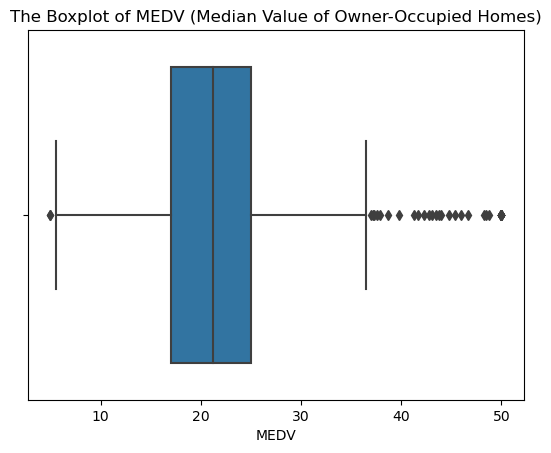

In [27]:
ax = sns.boxplot(x='MEDV', data=df1)
plt.title('The Boxplot of MEDV (Median Value of Owner-Occupied Homes)')
plt.xlabel('MEDV')
plt.show()


<span style="color: blue;">Conclusion: The boxplot shows there are a lots of outliers in the dependent variable. However, at first it is not meaningful to ignore them as long as it does not sound and make any sense.</span>

C:\Users\User\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


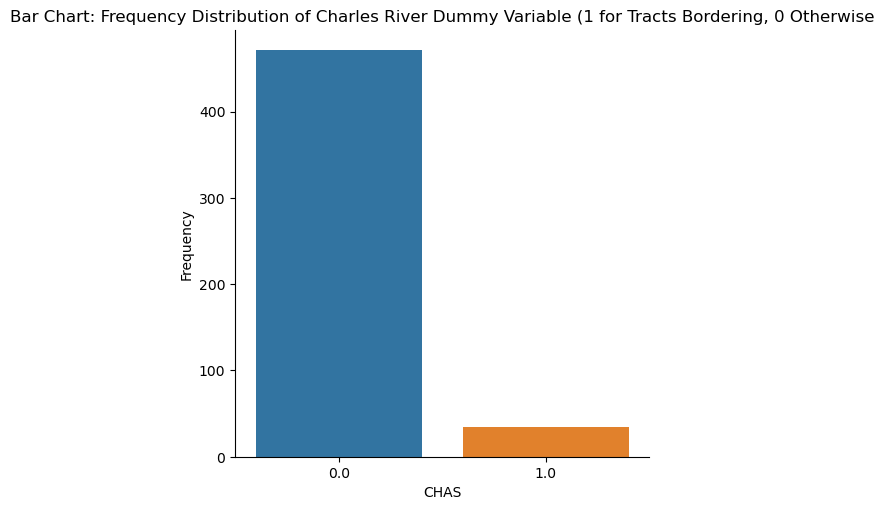

In [7]:
ax = sns.catplot(x='CHAS',kind='count', data=df1)
plt.title('Bar Chart: Frequency Distribution of Charles River Dummy Variable (1 for Tracts Bordering, 0 Otherwise')
plt.xlabel('CHAS')
plt.ylabel('Frequency')
plt.show()

In [18]:
df1.loc[(df1['AGE'] < 35), 'age_group'] = '<35 years old'
df1.loc[(df1['AGE'] >= 35) & (df1['AGE'] <= 70), 'age_group'] = '35 - 70 years old'
df1.loc[(df1['AGE'] > 70), 'age_group'] = '> 70 years old'

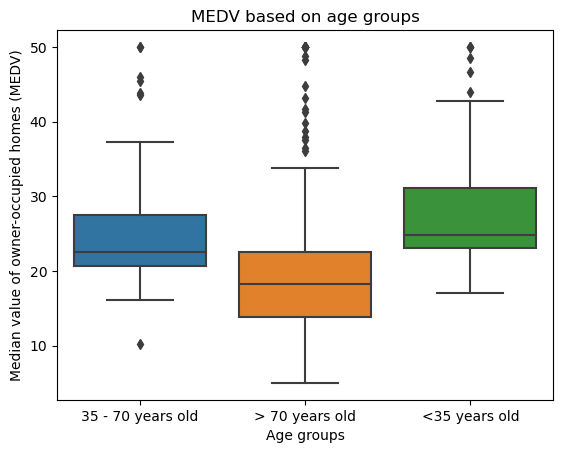

In [17]:
ax = sns.boxplot(x='age_group', y='MEDV', data=df1)
plt.title('MEDV based on age groups')
plt.xlabel('Age groups')
plt.ylabel('Median value of owner-occupied homes (MEDV)')
plt.show()

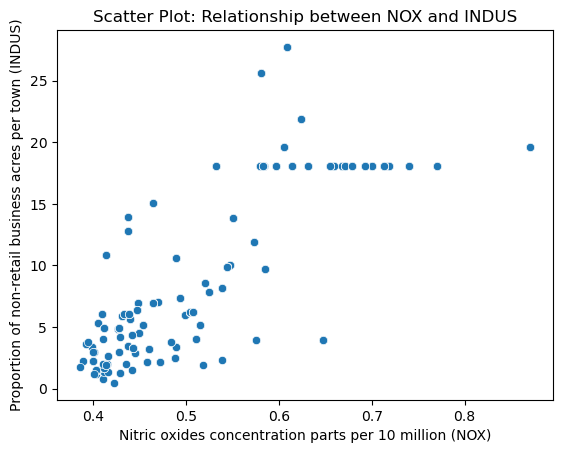

In [20]:
ax = sns.scatterplot(x='NOX', y='INDUS', data=df1)
plt.title('Scatter Plot: Relationship between NOX and INDUS')
plt.xlabel('Nitric oxides concentration parts per 10 million (NOX)')
plt.ylabel('Proportion of non-retail business acres per town (INDUS)')
plt.show()


In [24]:
scipy.stats.pearsonr(df1['NOX'], df1['INDUS'])


PearsonRResult(statistic=0.763651446920915, pvalue=7.913361061241167e-98)

<span style="color: blue;">Conclusion: The scatterplot reveals a positive correlation between NOX and INDUS, particularly pronounced in the lower left quadrant. Notably, NOX levels ascend even when INDUS values reach a plateau, implying that existing levels of INDUS are adequate to facilitate further increases in NOX. This pattern suggests that the relationship between NOX and INDUS transcends simple linear correlation, hinting at a more complex, potentially causal link between these variables.</span>

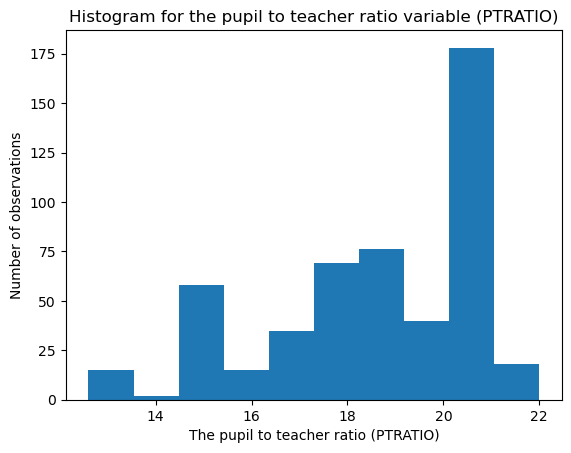

In [26]:
plt.hist(df1['PTRATIO'])
plt.xlabel('The pupil to teacher ratio (PTRATIO)')
plt.ylabel('Number of observations')
plt.title("Histogram for the pupil to teacher ratio variable (PTRATIO)")
plt.show()

<span style="color: blue;">Conclusion: The PTRATIO variable is left-skewed, This suggests, in this variable the order of central tendencies is as follows: mean < median < mode </span>

# Is there a significant difference in median value of houses bounded by the Charles river or not? (T test)


H0: The difference between values of houses bounded by the Charles river and ones that are not is not significant.


H1: The difference between values of houses bounded by the Charles river and ones that are not is significant.

In [8]:
scipy.stats.levene(df1[df1['CHAS'] == 0]['MEDV'], df1[df1['CHAS'] == 1]['MEDV'], center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [9]:
scipy.stats.levene(df1[df1['CHAS'] == 0]['MEDV'], df1[df1['CHAS'] == 1]['MEDV'], center='median') 

LeveneResult(statistic=4.590342218715871, pvalue=0.03263097600633006)

After these two tests which P values are all smaller than 0.05, 
it can be concluded that variances are equal across groups. T test can be carried out.

In [10]:
scipy.stats.ttest_ind(df1[df1['CHAS'] == 0]['MEDV'], df1[df1['CHAS'] == 1]['MEDV'], equal_var=True) 

TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

<span style="color: blue;">Conlusion: Since p-value is less than alpha value  of 0.05, we reject H0. The difference between values of houses bounded by the Charles river and ones that are not is not significant.</span>
                                                                                                                            

# Can we conclude that there is no relationship between Nitric oxide concentrations (NOX) and proportion of non-retail business acres per town （INDUS)? (Pearson correlation)



H0: There is no significant relationship between NOX and INDUS.

H1: There is significant relationship between NOX and INDUS.

In [14]:
scipy.stats.pearsonr(df1['NOX'], df1['INDUS'])

PearsonRResult(statistic=0.763651446920915, pvalue=7.913361061241167e-98)

<span style="color: blue;">Conclusion: Because p-value < 0.05, H0 is rejected.There is significant relationship between NOX and INDUS.</span>

# What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

H0: Weighted distance to the five Boston employment centres (DIS) has no significant impact on the median value of owner occupied homes 

H1: Weighted distance to the five Boston employment centres (DIS) has significant impact on the median value of owner occupied homes 

In [18]:
X = df1['DIS']
y = df1['MEDV']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 21 Feb 2024   Prob (F-statistic):           1.21e-08
Time:                        21:14:48   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<span style="color: blue;">Conclusion: Since p-value < 0.05, H0 is rejected.There is no significant correlation between DIS and MEDV.</span> 
